# 2. Bakery Transaction - Market Basket Analysis

베이커리 판매 데이터의 장바구니 분석<br>
판매 품목에 대한 베이커리 데이터 [Kaggle - Transaction from a bakery](https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery)

<br>

**분석 목표**
- 베이커리 판매에 영향을 주는 요인 찾기
- 베이커리 판매량 예측하기
- 세트 상품으로 출시하면 좋을 조합 제안하기

<br>

---

<br>

[2-1. Market Basket Analysis](#2-1.-Market-Basket-Analysis) <br>
[2-2. Conclusion of Market Basket Analysis](#2-2.-Conclusion-of-Market-basket-Analysis) <br>

## 2-1. Market Basket Analysis

주요 품목과 연관된 품목을 찾아보자

In [1]:
# 필요한 라이브러리 설치

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import mlxtend as ml
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
bakery = pd.read_csv('../input/transactions-from-a-bakery/BreadBasket_DMS.csv')
bakery.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


**희소 행렬 만들기**

mlxtend 라이브러리를 이용한 연관 규칙 분석을 수행하기 위해서는 각 행별로 품목이 포함되어 있으면 1 아니면 0인 데이터프레임을 만들어주어야한다.

In [3]:
bakery = bakery.groupby(['Transaction', 'Item']).size().reset_index(name='count')
basket = bakery.groupby(['Transaction', 'Item'])['count'].sum().unstack().reset_index().fillna(0).set_index('Transaction')

def encoding(x):
    if x <= 0:
        return 0
    else:
        return 1
    
basket = basket.applymap(encoding)
basket

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**변수 간 상관관계 확인**

In [4]:
basket.corr() 

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Item,,,,,,,,,,,,,,,,,,,,,
Adjustment,1.000000,-0.000690,-0.001982,-0.000278,-0.000648,-0.000105,-0.001304,-0.000729,-0.000235,-0.000257,...,-0.000105,-0.000802,-0.001278,-0.001903,-0.001469,-0.000481,-0.000379,-0.000420,-0.000759,-0.000278
Afternoon with the baker,-0.000690,1.000000,-0.013027,0.113756,-0.004259,-0.000690,-0.008570,-0.004790,-0.001542,-0.001690,...,-0.000690,0.014863,-0.008397,-0.012507,0.001491,-0.003163,-0.002488,-0.002761,-0.004986,-0.001825
Alfajores,-0.001982,-0.013027,1.000000,-0.005246,0.014537,-0.001982,-0.002183,0.002126,-0.004433,-0.004857,...,-0.001982,-0.007908,0.012506,-0.020289,0.016296,-0.009093,-0.007151,-0.007935,0.000941,0.015518
Argentina Night,-0.000278,0.113756,-0.005246,1.000000,-0.001715,-0.000278,-0.003451,-0.001929,-0.000621,-0.000680,...,-0.000278,-0.002121,-0.003381,-0.005037,-0.003887,-0.001274,-0.001002,0.093494,-0.002008,-0.000735
Art Tray,-0.000648,-0.004259,0.014537,-0.001715,1.000000,0.161906,0.005236,0.019019,0.071262,-0.001588,...,-0.000648,0.016458,-0.007891,0.006788,0.014630,-0.002973,-0.002338,-0.002594,-0.004686,-0.001715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tshirt,-0.000481,-0.003163,-0.009093,-0.001274,-0.002973,-0.000481,-0.005982,-0.003343,-0.001077,-0.001179,...,-0.000481,-0.003677,-0.005861,-0.008730,0.009189,1.000000,0.119525,-0.001927,-0.003480,-0.001274
Valentine's card,-0.000379,-0.002488,-0.007151,-0.001002,-0.002338,-0.000379,-0.004705,-0.002629,-0.000847,-0.000928,...,-0.000379,-0.002892,-0.004610,-0.006866,-0.005299,0.119525,1.000000,-0.001515,-0.002737,-0.001002
Vegan Feast,-0.000420,-0.002761,-0.007935,0.093494,-0.002594,-0.000420,-0.005220,-0.002917,-0.000939,-0.001029,...,-0.000420,-0.003209,-0.005115,-0.007618,-0.005880,-0.001927,-0.001515,1.000000,-0.003037,-0.001112


커피와 다른 변수들간의 상관 관계 확인

In [5]:
basket.corr()['Coffee'].sort_values(ascending = False)

Item
Coffee              1.000000
Toast               0.085315
Keeping It Local    0.054630
Medialuna           0.048212
Pastry              0.047190
                      ...   
Baguette           -0.074150
Tea                -0.102049
Scandinavian       -0.106244
Farm House         -0.123025
Bread              -0.277830
Name: Coffee, Length: 95, dtype: float64

<AxesSubplot:xlabel='Item'>

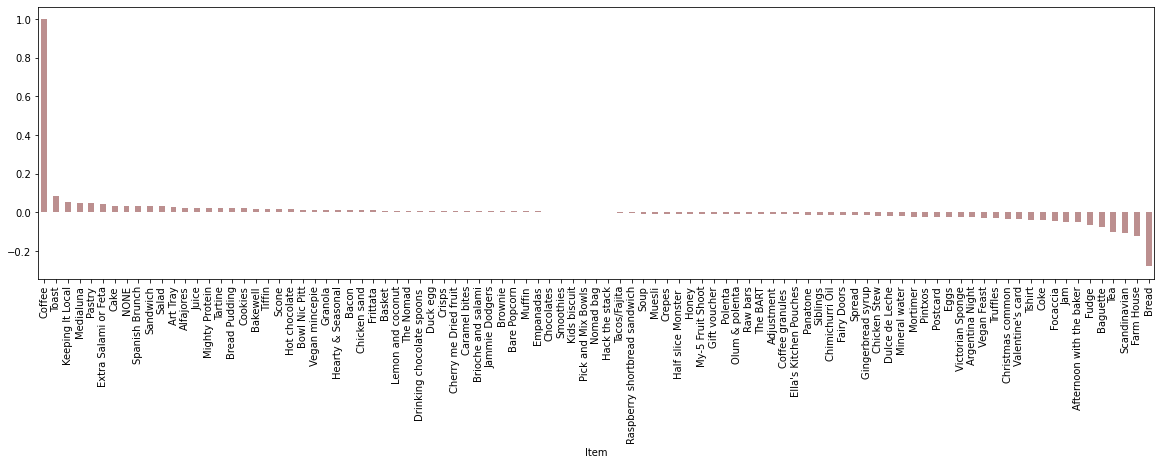

In [6]:
basket.corr()['Coffee'].sort_values(ascending = False).plot(kind='bar', figsize=(20,5), color="rosybrown")

티와 다른 변수들간의 상관 관계 확인

In [7]:
basket.corr()['Tea'].sort_values(ascending = False)

Item
Tea             1.000000
Cake            0.084853
NONE            0.075121
Soup            0.065932
Scone           0.054029
                  ...   
Baguette       -0.044508
Scandinavian   -0.055639
Farm House     -0.058417
Coffee         -0.102049
Bread          -0.110935
Name: Tea, Length: 95, dtype: float64

<AxesSubplot:xlabel='Item'>

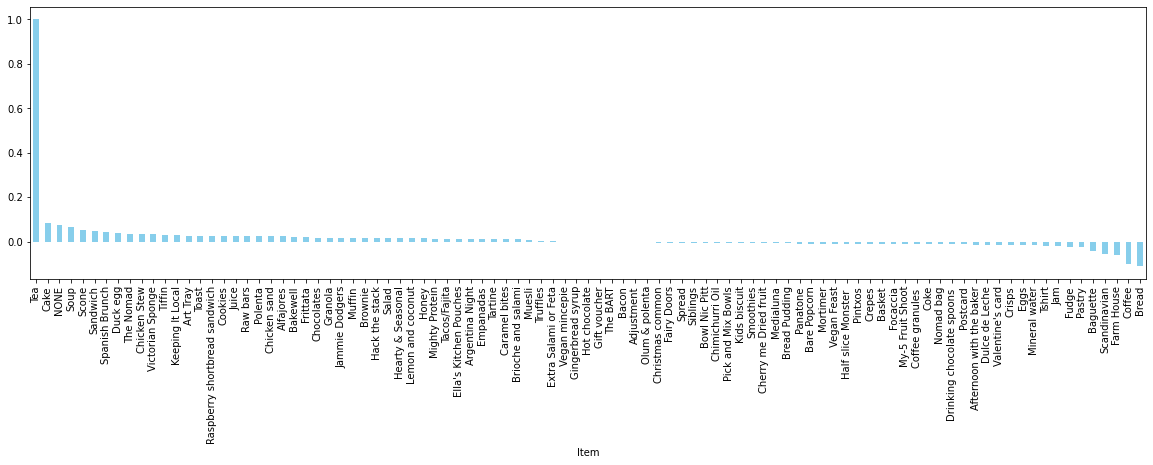

In [8]:
basket.corr()['Tea'].sort_values(ascending = False).plot(kind='bar', figsize=(20,5), color=("skyblue"))

**빈발 품목 집합 구하기**

최소 지지도는 0.01, 품목 집합 최대 품목 개수는 3개로 설정하여 품목 집합을 구한다. 

지지도가 0.01 이상인 연관 규칙들 중 향상도가 1.2 이상인 규칙들을 지지도를 기준으로 내림차순하여 나타낸다.

In [9]:
itemset_frequency = apriori(basket, min_support=0.01, max_len=3, use_colnames=True)
bakery_rules = association_rules(itemset_frequency, metric="lift", min_threshold=1.2)
bakery_rules.sort_values('confidence', ascending = False, inplace = True)
bakery_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,(Toast),(Coffee),0.033365,0.475081,0.023502,0.704403,1.482699,0.007651,1.775789
4,(Spanish Brunch),(Coffee),0.018046,0.475081,0.010807,0.598837,1.260494,0.002233,1.308493
9,(NONE),(Tea),0.079005,0.141643,0.018256,0.231076,1.631394,0.007066,1.116309
3,(Cake),(Tea),0.103137,0.141643,0.023607,0.228891,1.615972,0.008999,1.113146
11,(Sandwich),(Tea),0.071346,0.141643,0.014269,0.200000,1.412000,0.004164,1.072946


향상도를 색으로 구분하여 bakery_rules의 분포를 확인해보자.

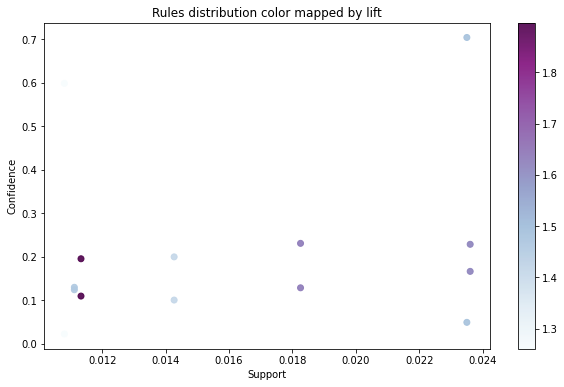

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(bakery_rules['support'], bakery_rules['confidence'], c=bakery_rules['lift'], alpha=0.9, cmap='BuPu');
plt.title('Rules distribution color mapped by lift');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

**장바구니 분석 결과 확인**

In [11]:
idx = 1
for i in bakery_rules.index: 
    print(str(idx) + " 번째 연관 규칙 : " + list(bakery_rules['antecedents'][i])[0] + " => " + list(bakery_rules['consequents'][i])[0]+"\n"
      "Support: " + str(round(bakery_rules['support'][i],2))+"\n"
      "Confidence: " + str(round(bakery_rules['confidence'][i],2))+"\n"
      "Lift: " + str(round(bakery_rules['lift'][i], 2))+"\n\n")
    idx += 1

1 번째 연관 규칙 : Toast => Coffee
Support: 0.02
Confidence: 0.7
Lift: 1.48


2 번째 연관 규칙 : Spanish Brunch => Coffee
Support: 0.01
Confidence: 0.6
Lift: 1.26


3 번째 연관 규칙 : NONE => Tea
Support: 0.02
Confidence: 0.23
Lift: 1.63


4 번째 연관 규칙 : Cake => Tea
Support: 0.02
Confidence: 0.23
Lift: 1.62


5 번째 연관 규칙 : Sandwich => Tea
Support: 0.01
Confidence: 0.2
Lift: 1.41


6 번째 연관 규칙 : Hot chocolate => Cake
Support: 0.01
Confidence: 0.2
Lift: 1.9


7 번째 연관 규칙 : Tea => Cake
Support: 0.02
Confidence: 0.17
Lift: 1.62


8 번째 연관 규칙 : Pastry => Coffee
Support: 0.01
Confidence: 0.13
Lift: 1.45


9 번째 연관 규칙 : Tea => NONE
Support: 0.02
Confidence: 0.13
Lift: 1.63


10 번째 연관 규칙 : Coffee => Pastry
Support: 0.01
Confidence: 0.12
Lift: 1.45


11 번째 연관 규칙 : Cake => Hot chocolate
Support: 0.01
Confidence: 0.11
Lift: 1.9


12 번째 연관 규칙 : Tea => Sandwich
Support: 0.01
Confidence: 0.1
Lift: 1.41


13 번째 연관 규칙 : Coffee => Toast
Support: 0.02
Confidence: 0.05
Lift: 1.48


14 번째 연관 규칙 : Coffee => Spanish Brunch
Support:

---

## 2-2. Conclusion of Market basket Analysis<br>


지지도가 0.01 이상이면서 향상도가 1.2 이상인 연관 규칙들 중 신뢰도가 높은 순으로 상위 5개의 연관 규칙을 뽑아보았다.
- Toast를 산다면 Coffee를 산다 (신뢰도 70%)
- Spanish Brunch를 산다면 Coffee를 산다 (신뢰도 60%)
- Cake를 산다면 Tea를 산다 (신뢰도 23%)
- Sandwich를 산다면 Tea를 산다 (신뢰도 20%)
- Hot chocolate을 산다면 Cake를 산다 (신뢰도 20%)

<br>

▶ 세트 상품으로 출시하면 좋을 조합은 Cake와 Hot chocolate 또는 Tea, Spanish Brunch와 Coffee, Toast와 Coffee, Sandwich와 Tea이다.